In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
csv_path = "mtfuji_data.csv"

np.set_printoptions(suppress=True)
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [4]:
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


# 問題1

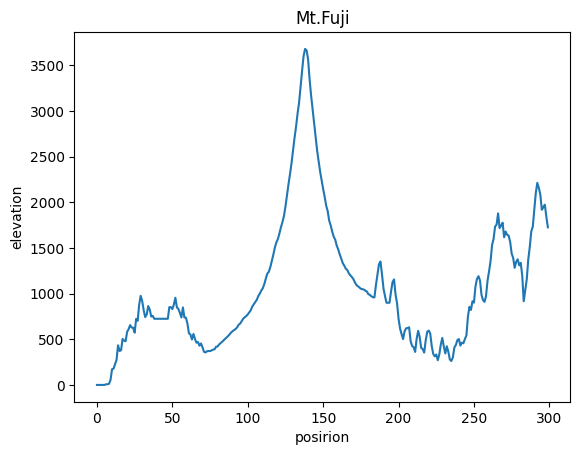

In [5]:
plt.xlabel("posirion")
plt.ylabel("elevation")
plt.title("Mt.Fuji")
plt.plot(fuji[:,0],fuji[:,3])
plt.show()

# 問題2

In [6]:
def fuji_grad(point, data):
    x = 1
    y = data[point, 3] - data[point-1, 3]
    grad = y / x
    return grad

point=136
print("今いる地点の勾配は{}".format(fuji_grad(point,fuji)))

今いる地点の勾配は168.35000000000036


# 問題3

In [7]:
def move_position(point, data, alpha=0.2):
    move_p = point - (alpha * fuji_grad(point, data))
    if move_p <= 0:
        move_p = 1
    elif move_p > len(data)-1:
        move_p = len(data)-1
    else:
        move_p = move_p
    return np.round(move_p).astype(int)

move_position(50,fuji)

54

# 問題4

In [14]:
def mt_down(point, data, alpha=0.2):
    point_list = []
    point_t = point
    while point_t not in point_list[:-1]:
        point_t = move_position(point_t, data, alpha=alpha)
        point_list.append(point_t)
    point_list.insert(0,point)
    return point_list[:-1]

point = 136
mt_down(point,fuji)

[136, 119, 113, 108, 105, 102, 100, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80]

# 問題5

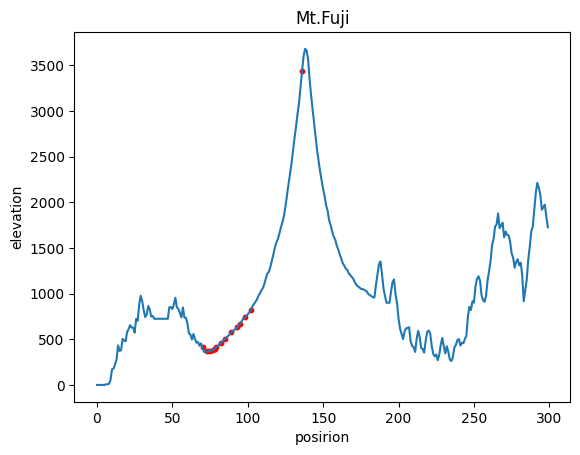

In [9]:
point = 136
point_list = mt_down(point,fuji)

plt.xlabel("posirion")
plt.ylabel("elevation")
plt.title("Mt.Fuji")
plt.plot(fuji[:,0],fuji[:,3])
plt.scatter(point_list, fuji[point_list,3], color='red', s=10)
plt.show()

# 問題6

In [10]:
p_list = []
for p in range(1,len(fuji)):
    p_list.append(mt_down(p,fuji))
    
print(len(p_list))

299


# 問題7

In [11]:
# 初期値
initial_value_list = [15, 50, 88, 153, 281]

p_list=[]
for p in initial_value_list:
    p_list.append(mt_down(p,fuji))
print(len(p_list))

5


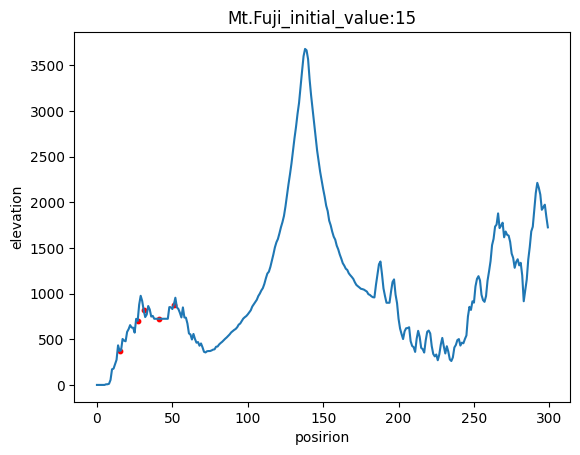

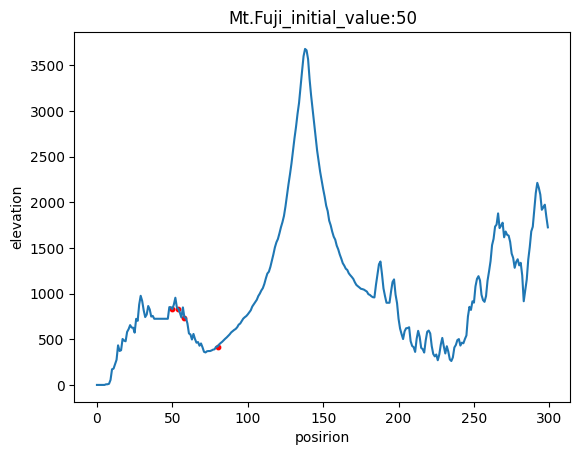

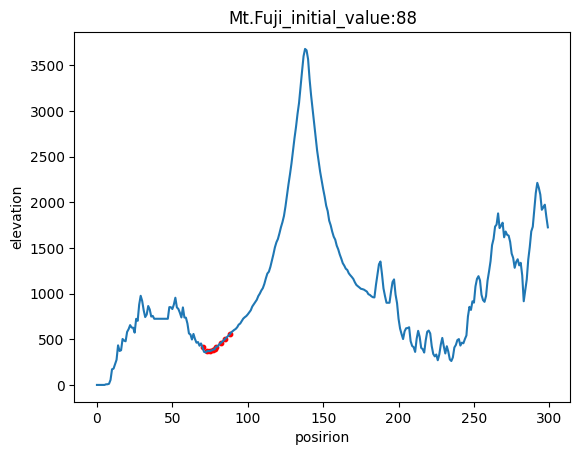

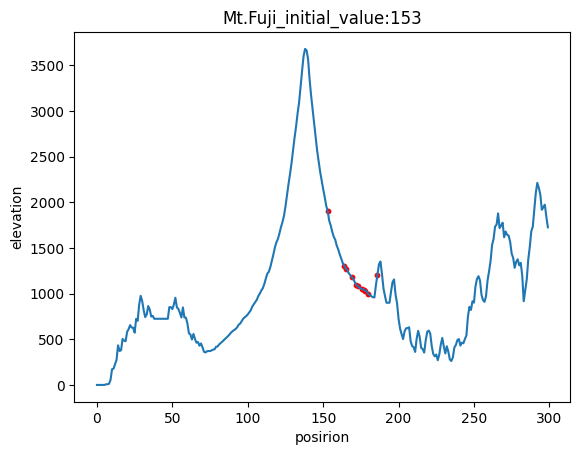

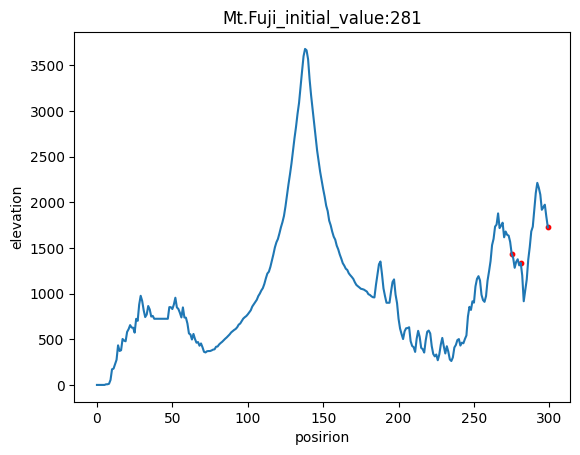

In [12]:
for i in range(len(p_list)):
    plt.xlabel("posirion")
    plt.ylabel("elevation")
    plt.title("Mt.Fuji_initial_value:{}".format(initial_value_list[i]))
    plt.plot(fuji[:,0],fuji[:,3])
    plt.scatter(p_list[i], fuji[p_list[i],3], color='red', s=10)
    plt.show()

# 問題8

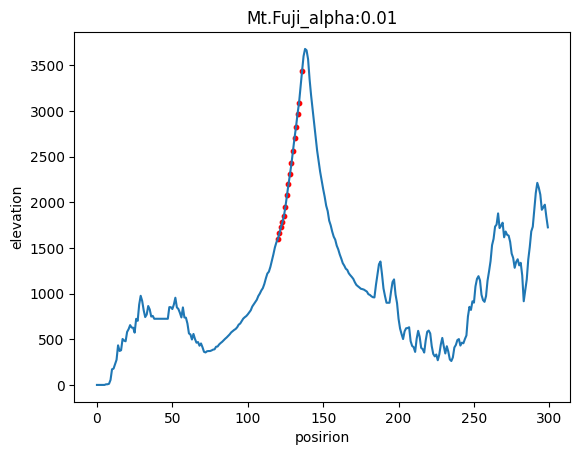

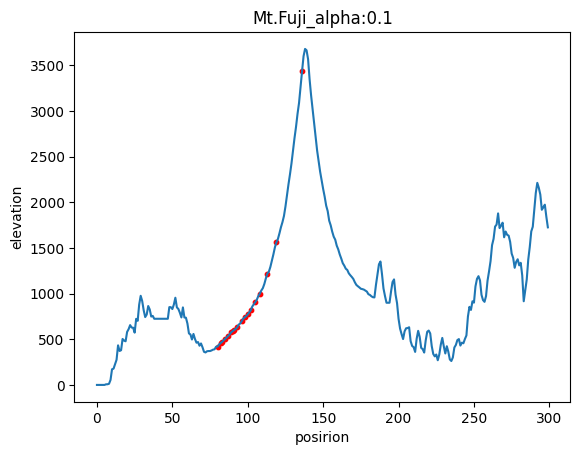

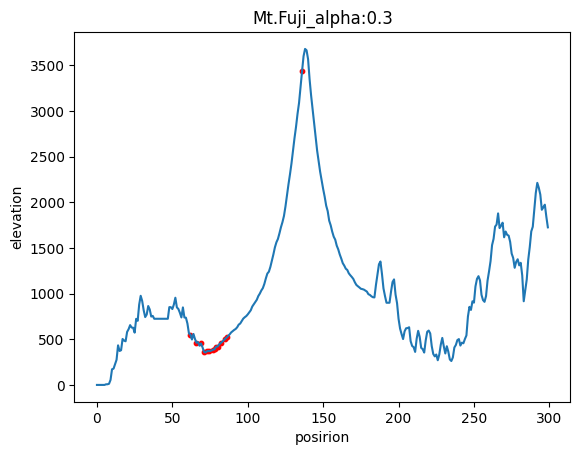

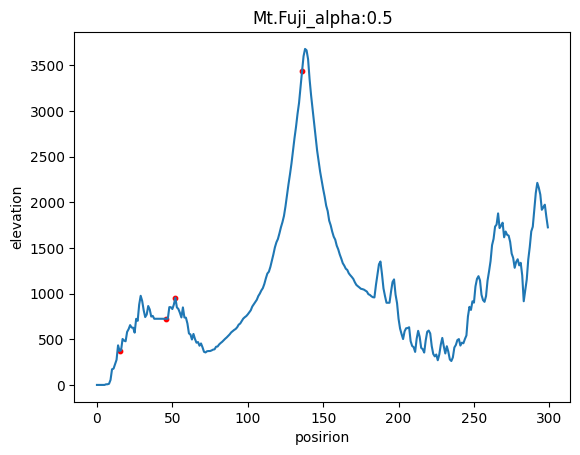

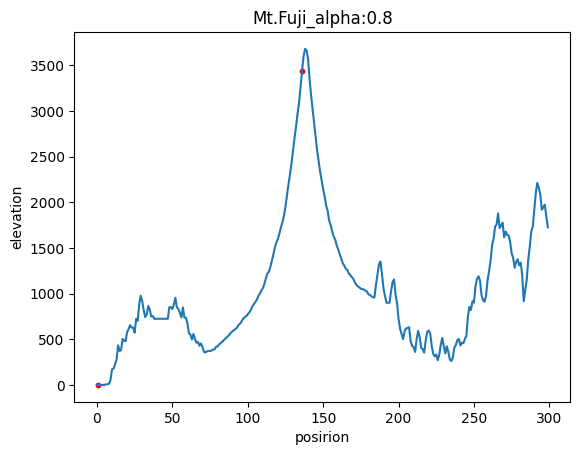

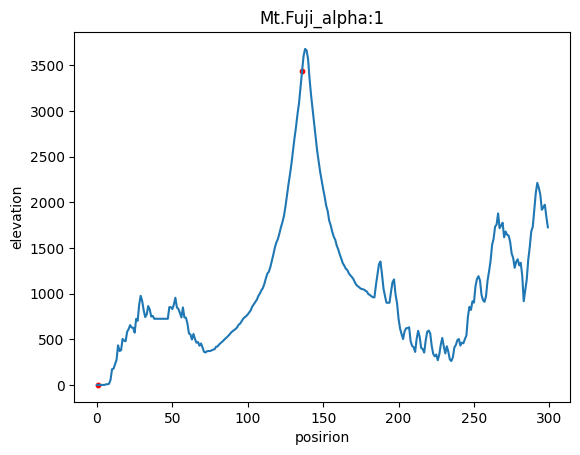

In [15]:
alpha_list = [0.01, 0.1, 0.3, 0.5, 0.8, 1]


point = 136
for alpha in alpha_list:
    p_list=[]
    p_list.append(mt_down(point, fuji, alpha=alpha))

    plt.xlabel("posirion")
    plt.ylabel("elevation")
    plt.title("Mt.Fuji_alpha:{}".format(alpha))
    plt.plot(fuji[:,0],fuji[:,3])
    plt.scatter(p_list, fuji[p_list,3], color='red', s=10)
    plt.show()